# Нормирани простори

<div>
   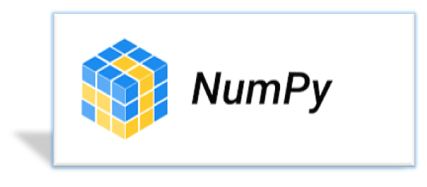  
</div>

**Садржај**:
1. [Норма вектора](#Норма-вектора)
1. [Норме матрица](#Норме-матрица)
1. [Базе векторских простора](#Базе-векторских-простора)

In [1]:
import numpy as np
import numpy.linalg as npl
import numpy.random as rndm
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

***

## Норма вектора

Функција која уводи дужине и растојања у векторске просторе је норма. Игра улогу апсолутне вредности међу реалним бројевима, односно модула код комплексних бројева. Осим свог геометријског значења дужине, норма вектора је један број који носи пуно информација о компонентама унутар вектора. 

Уграђена функција за израчунавање норме вектора део је linalg бибкиотеке NumPy-a.

|Операција|Симбол|Име на енглеском|
|---:|:---:|:---|
|Норма вектора|`linalg.norm()`|Vector norm|

**Дефиниција 1.** Нека је $V$ векторски простор над пољем скалара $\mathbb{R}.$ Пресликавање $\|\cdot\|:V\to\mathbb{R}_0^+$ назива се норма вектора ([vector norm](https://en.wikipedia.org/wiki/Norm_(mathematics))) на $V$ уколико има особине:
- [N1:] $\quad\|v\|=0\ \Longleftrightarrow\ v=\theta,\quad\forall v\in V;$
- [N2:] $\quad\|\alpha v\|=|\alpha|\,\|v\|,\quad\forall v\in V,\alpha\in\mathbb{R};$
- [N3:] $\quad\|u+v\|\leq\|u\|+\|v\|,\quad\forall u,v\in V.$

Векторски простор снабдевен нормом зовемо [нормиран векторски простор](https://en.wikipedia.org/wiki/Normed_vector_space).

Норма је функција која као улаз има неки вектор, а излаз те функције је позитивна (тачније ненегативна) вредност формирана на основу карактеристика улазног вектора. Минимум функције норме постиже се само у случају улаза који је нула-вектор $\theta.$ Појам норме је кључан за нумеричке алгоритме јер се помоћу ње изражава квалитет резултата алгоритма или описује циљ алгоритма. 

Особина норме N3 позната је још и као неједнакост троугла. На основу ове особине добија се и обрнута неједнакост троугла којом је описана доња граница норме збира или разлике вектора.

**Лема 1.** *Обрнута неједнакост троугла*

За произвољне векторе $u$ и $v$ нормираног векторског простора важи
$$\big|\|u\|-\|v\|\big|\leq\|u+v\|.$$

**Доказ:** 

\begin{align}
\|u\|=\|u+v-v\|\leq\|u+v\|+\|v\|\quad&\Longrightarrow\quad \|u\|-\|v\|\leq\|u+v\|\\
\|v\|=\|u+v-u\|\leq\|u+v\|+\|u\|\quad&\Longrightarrow\quad \|v\|-\|u\|\leq\|u+v\|\\
&\Longrightarrow\quad \big|\|u\|-\|v\|\big|\leq\|u+v\|.\quad\Box
\end{align}

***

Постојање норме унутар векторског простора омогућава увођење растојања, тј. метрике, између два објекта или између скупова објеката.

**Дефиниција 2.**
За непразан скуп $M$ функција $d:M^2\mapsto\mathbb{R}_0^+$ представља метрику (distance, distance metrics) на њему уколико испуњава особине:
- [M1:] $(\forall u,v\in M)\big(d(u,v)=0\ \Longleftrightarrow\ u=v\big);$
- [M2:] $(\forall u,v\in M)\quad d(u,v)=d(v,u);$
- [M3:] $(\forall u,v,w\in M)\big(d(u,v)\leq d(u,w)+d(w,v)\big).$
   
Уређени пар $(M,d)$ тада зовемо [метрички простор](https://en.wikipedia.org/wiki/Metric_space). 


**Дефиниција 3.** За два скупа $S_1,S_2$ метричког простора $M$ њихово растојање је 
$$d(S_1,S_2)=\inf_{x\in S_1,y\in S_2}d(x,y).$$

Нормирани векторски простори постају метрички простори индукованом метриком.

**Дефиниција 4.**
За дате векторе $u,v \in V$ нормираног векторског простора њихово растојање је
		$$d(u,v) = \|u-v\|.$$	
        
Функција $\|u-v\|$ је **индукована метрика** нормом на векторском простору.        

Норма вектора може да се дефинише помоћу скаларног производа. На тај начин сваки унитаран простор постаје нормиран, потом и метрички простор.
$$\|v\|=\sqrt{\langle v,v\rangle}.$$ 
Овако дефинисану норму зовемо **норма индукована скаларним производом** (induced norm).

Најважнији изрази индуковане норме су
- [Шварцова неједнакост](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality) у литератури позната и као Коши-Шварц-Буњаковски неједнакост: 
$$|\langle v,u\rangle|\leq\|v\|\ \|u\|,$$
- Косинус угла $$\cos\angle(u,v)=\dfrac{\langle v,u\rangle}{\|v\|\ \|u\|}.$$

Зог краћег записа биће коришћена ознака за скуп индекса по угледу на Python ознаке опсега:
$$(n)=\{0,1,2,\dots,n-1\},\qquad [n]=\{0,1,2,\dots,n-1,n\}=(n+1).$$

In [2]:
np.arange(4)

array([0, 1, 2, 3])

У наставку радићемо нормом индукованом стандардним скаларним производом. Зовемо је **Еуклидова норма** (Euclidean norm). Експлицитни израз Еуклидове норме када је вектор задат својим компонентама $v=\begin{bmatrix} x_0&x_1&\dots&x_{n-1}\end{bmatrix}^T$ гласи:
$$\|v\|=\sqrt{|x_0|^2+|x_1|^2+\dots+|x_{n-1}|^2}=\sqrt{\sum_{k\in(n)}|x_k|^2}.$$ 
Када су компоненте $x_k$ реални бројеви нема потребе писати ознаку за модуо, тј. Еуклидова норма у реалном случају гласи
$$\|v\|=\sqrt{x_0^2+x_1^2+\dots+x_{n-1}^2}
=\sqrt{\sum_{k\in(n)}x_k^2}.$$

Метрика индукована Еуклидовом нормом се сходно томе зове **Еуклидова метрика**. За два реална вектора дата својим компонентама
$$v=\begin{bmatrix} x_0&x_1&\dots&x_{n-1}\end{bmatrix}^T,\qquad 
u=\begin{bmatrix} y_0&y_1&\dots&y_{n-1}\end{bmatrix}^T$$
њихово Еуклидово растојање је
$$
d(u,v)=\sqrt{(x_0-y_0)^2+(x_1-y_1)^2+\dots+(x_{n-1}-y_{n-1})^2}
=\sqrt{\sum_{k\in(n)}(x_k-y_k)^2}.$$

>Вектор норме $1$ зовемо **јединични** или **нормирани** вектори (unit vectors).

Сваки не нула вектор може се поступком **нормирања** свести на вектор истог правца и смера, али интензитета $1,$
$$v^{\ast}=\dfrac{v}{\|v\|}\,.$$

**Primer 1.** Dati su vektori 
$$v=\begin{bmatrix}2&1&1&-1\end{bmatrix}^T,\qquad u=\begin{bmatrix}1&2&0&-2\end{bmatrix}^T.$$
a) Odredićemo Euklidovo rastojanje vektora $v$ i $u.$

In [3]:
v=np.array([2,1,1,-1])
u=np.array([1,2,0,-2])
rastojanje=np.linalg.norm(v-u)
print("Euklidovo rastojanje vektora je", rastojanje)

Euklidovo rastojanje vektora je 2.0


b) Proverićemo nejednakosti trougla za vektore $v$ i $u.$
$$\big|\|v\|-\|u\|\big|\leq\|v-u\|\leq\|v\|+\|u\|$$

In [4]:
rastojanje<=np.linalg.norm(v)+np.linalg.norm(u)

True

In [5]:
np.abs(np.linalg.norm(v)-np.linalg.norm(u))<=rastojanje

True

c) Proverićemo Košijevu nejednakost za vektore $v$ i $u.$
$$|v\cdot u|\leq\|v\|\,\|u\|$$

In [6]:
abs(np.dot(v,u))<=np.linalg.norm(v)*np.linalg.norm(u)

True

***

**Задатак 1.** Ако су $v$ и $u$ јединични ортогонални вектори реалног векторског простора, онда је $\|u-v\|=\sqrt2.$ Норма је индукована скаларним производом.

**Решење :** 

$\|u\|=\|v\|=1,\quad u\perp v$
\begin{align}
\|u-v\|^2&=(u-v)\cdot(u-v)=(u-v)^T(u-v)=u^Tu-u^Tv-v^Tu+v^Tv=\|u\|^2+\|v\|^2=2,\\
\|u-v\|&=\sqrt2.
\end{align}

***

**Задатак 2.** Користећи Шварцову неједнакост доказати неједнакост троугла за реалне векторе $v$ и $u$.

**Решење:**

Шварцова неједнакост: $|v\cdot u|\leq\|v\|\,\|u\|\quad\Longrightarrow\quad
v\cdot u\leq\|v\|\,\|u\|.$
\begin{align}
    &\|u+v\|^2=(u+v)\cdot(u+v)=u\cdot u+v\cdot v
    +2v\cdot u\\
    &\phantom{\|u+v\|^2}=\|u\|^2+\|v\|^2+2v\cdot u
    \leq\|u\|^2+\|v\|^2+2\|v\|\,\|u\|=\big(\|u\|+\|v\|\big)^2\\
    &\quad\Longleftrightarrow\quad\|u+v\|\leq\|u\|+\|v\|
\end{align}

***

**Задатак 3.** Показати да за $x_0,x_1,\dots,x_{n-1}\in\mathbb{R}$ важи   
$$(x_0+x_1+\dots+x_{n-1})^2\leq n(x_0^2+x_1^2+\dots+x_{n-1}^2).$$

**Решење:**

Шварцова неједнакост гласи
$$|u\cdot v|\leq\|u\|\,\|v\|.$$
Њеним квадрирањем добијамо
\begin{align}
(u\cdot v)^2&\leq\|u\|^2\,\|v\|^2. \label{kvkosi}\tag{1}
\end{align}
Уведимо ознаке координата вектора
\begin{align}
    u&=\begin{bmatrix} x_0&x_1&\dots&x_{n-1}\end{bmatrix}^T,
    &&\mathbb{1}=\begin{bmatrix} 1&1&\dots&1\end{bmatrix}^T\in\mathbb{R}^n.
\end{align}
Тада је
\begin{align}
    (u\cdot \mathbb{1})^2&=(x_0+x_1+\dots+x_{n-1})^2,\\
    \|u\|^2&=x_0^2+x_1^2+\dots+x_{n-1}^2,\\
    \|\mathbb{1}\|^2&=n.
\end{align}
Применом неједнакости (\ref{kvkosi}) за векторе $u$ и $\mathbb{1}$ добијамо
$$(x_0+x_1+\dots+x_{n-1})^2\leq n(x_0^2+x_1^2+\dots+x_{n-1}^2).$$

***

**Задатак 4.** За два вектора $a,b\in\mathbb{R}^n$ одредити симетрални скуп, тј. скуп вектора једнако удаљених од $a$ и $b.$ Метрика је индукована скаларним производом.

**Решење :**

$\|a-v\|=\|b-v\|\quad\Longleftrightarrow\quad \|a-v\|^2=\|b-v\|^2$
\begin{align}
         \Longleftrightarrow&\|a-v\|^2-\|b-v\|^2=0\quad
         \Longleftrightarrow\quad (a-v)\cdot(a-v)-(b-v)\cdot(b-v)=0\\
         \Longleftrightarrow&\|a\|^2-2a\cdot v+\|v\|^2-\|b\|^2+2b\cdot v-\|v\|^2=0\\
         \Longleftrightarrow&\|a\|^2-\|b\|^2=2(a-b)\cdot v
\end{align}
$\Longrightarrow$ тражени симетрални скуп гласи:
$$S_{a,b}=\left\{v\in\mathbb{R}^n\ \big|\ (a-b)\cdot v=\dfrac{\|a\|^2-\|b\|^2}{2}\right\}.$$
Покажимо: $\forall v,u\in S_{a,b}\qquad (v-u)\perp(a-b).$

Како је $(v-u)\perp(a-b)\ \Longleftrightarrow\ (v-u)\cdot(a-b)=0$ и
$$(v-u)\cdot(a-b)=v\cdot(a-b)-u\cdot(a-b)=\dfrac{\|a\|^2-\|b\|^2}{2}-\dfrac{\|a\|^2-\|b\|^2}{2}=0,$$
закључујемо да је тврђење о ортогоналности тачно.

***

Најчешће коришћене норме вектора су тзв. [$l_p$ норме](https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm): $\|v\|_p=\left(\displaystyle\sum_{k\in(n)}|x_k|^p\right)^{1/p},\ p\geq1,$ чији су специјални случајеви: 

-  $l_1$: $\|v\|_1=\displaystyle\sum_{k\in(n)}|x_k|,$ позната још и као Менхетн норма или такси норма,
-  $l_2$: $\|v\|_2=\sqrt{\displaystyle\sum_{k\in(n)}|x_k|^2},$ Еуклидова норма,
-  $l_{\infty}$: $\|v\|_{\infty}=\displaystyle\max_{k\in(n)}\{|x_k|\},$ maks норма или норма Чебишева.

Дати изрази заиста задовољавају неједнакост троугла на основу [неједнакости Минковског](https://en.wikipedia.org/wiki/Minkowski_inequality),
$$\left(\sum_{k\in(n)}|x_k+y_k|^p\right)^{1/p}\leq
\left(\sum_{k\in(n)}|x_k|^p\right)^{1/p}+\left(\sum_{k\in(n)}|y_k|^p\right)^{1/p},\qquad p\geq1.$$

Од наведених норми само је $l_2$ норма индукована скаларним производом.

**Пример 2.** Потражићемо јединичне кружнице у равни у односу на норме : $l_1,l_{3/2},l_2,l_4$ и $l_{\max}.$

Јединичну кружницу у односу на $l_1$ норму чине следећи вектори $v=\begin{bmatrix}x&y\end{bmatrix}:$
$$\|v\|_1=|x|+|y|=1.$$
У првом квадранту, где је $x,y\geq0,$ то су вектори чије координате задовољавају једнакост $x+y=1\quad\Longleftrightarrow\quad y=1-x.$

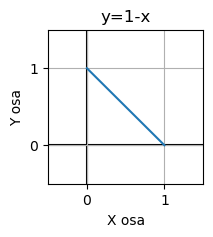

In [7]:
x=np.linspace(0,1,50)
y=1-x
plt.figure(figsize=(2,2))
plt.title("y=1-x") 
plt.plot(x,y)
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.xticks([ 0, 1])
plt.yticks([ 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

За остале квадранте можемо да искористимо чињеницу да је $|x|+|y|=|-x|+|y|=|x|+|-y|=|-x|+|-y|,$ тј. слика ће бити симетрична у односу на $x$ и $y$ осу.

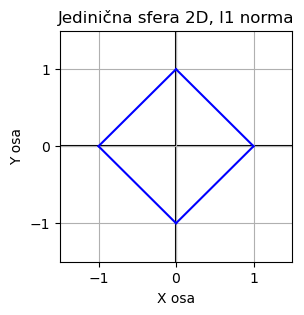

In [8]:
plt.figure(figsize=(3,3))
plt.title("Jedinična sfera 2D, l1 norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

U slučaju da ovakvu analizu jedinične sfere ne želimo do sprovedemo, tj. ako ne želimo da dobijemo eksplicitni oblik funkcije u zavisnosti od koordinata $y=f(x),$ za prikaz krajnjih tačaka jediničnih vektora možemo da koristimo logičke nizove ili [nizove sa maskom](https://numpy.org/doc/stable/reference/maskedarray.html). U te svrhe koristimo naredbu `meshgrid` kako bismo kreirali mrežu koordinata u ravni. Jednostavni primeri njene primene dati su u nastavku

In [9]:
t=np.array([-1,0,1])
X,Y=np.meshgrid(t,t)
X,Y

(array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]),
 array([[-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]]))

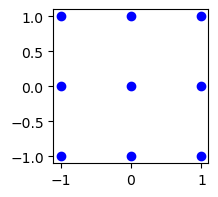

In [10]:
plt.figure(figsize=(2,2))
plt.plot(X,Y,'bo');

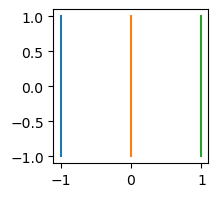

In [11]:
plt.figure(figsize=(2,2))
plt.plot(X,Y);

Iskoristićemo ovu naredbu za kreiranje mreže koordinata gušće raspoređenih tačaka.

In [12]:
n=100
t=np.linspace(-1,1,n)
Xt,Yt=np.meshgrid(t,t)
Xt=Xt.reshape(n*n,)
Yt=Yt.reshape(n*n,)

Iz kreirane mreže tačaka biće prikazane samo one koje pripadaju jediničnoj sferi u odnosu na $l_1$ normu.

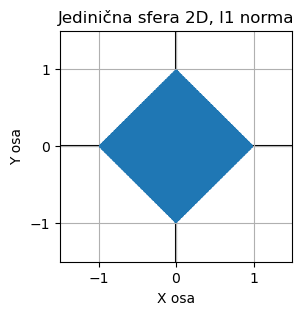

In [13]:
Zt=(np.abs(Xt)+np.abs(Yt)<=1)
plt.figure(figsize=(3,3))
plt.title("Jedinična sfera 2D, l1 norma") 
plt.plot(Xt[Zt],Yt[Zt])
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

Jediničnu kružnicu u odnosu na $l_{3/2}$ normu čine sledeći vektori $v=\begin{bmatrix}x&y\end{bmatrix}:$
$$\|v\|_{3/2}=\big(|x|^{3/2}+|y|^{3/2}\big)^{2/3}=1.$$
U prvom kvadrantu, gde je $x,y\geq0,$ to su vektori čije koordinate zadovoljavaju jednakost $x^{3/2}+y^{3/2}=1\quad\Longleftrightarrow\quad y=\big(1-x^{3/2}\big)^{2/3}.$

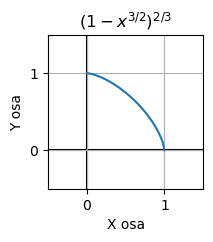

In [14]:
y=(1-x**(3/2))**(2/3)
plt.figure(figsize=(2,2))
plt.title(r"$(1-x^{3/2})^{2/3}$") 
plt.plot(x,y)
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.xticks([ 0, 1])
plt.yticks([ 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

Za ostale kvadarnte možemo da iskoristimo činjenicu da je $|x|^{3/2}+|y|^{3/2}=|-x|^{3/2}+|y|^{3/2}=|x|^{3/2}+|-y|^{3/2}=|-x|^{3/2}+|-y|^{3/2},$ tj. slika će biti simetrična u odnosu na $x$ i $y$ osu.

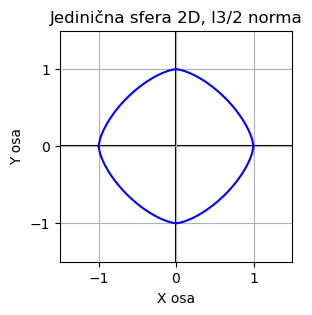

In [15]:
plt.figure(figsize=(3,3))
plt.title("Jedinična sfera 2D, l3/2 norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

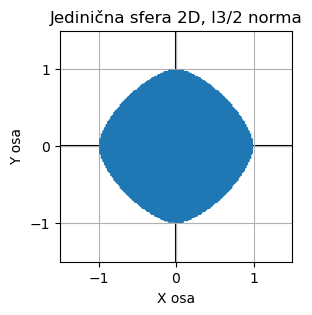

In [16]:
Zt=(np.abs(Xt)**(3/2)+np.abs(Yt)**(3/2)<=1)
plt.figure(figsize=(3,3))
plt.title("Jedinična sfera 2D, l3/2 norma") 
plt.plot(Xt[Zt],Yt[Zt])
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

Na slične načine dobijamo prikaze jediničnih kružnica u odnosu na ostale norme.

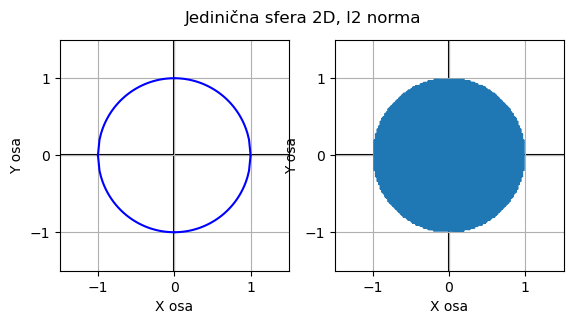

In [17]:
y=(1-x**2)**(1/2)
slika, ax = plt.subplots(1, 2,figsize=(6.5,3)) 
slika.suptitle('Jedinična sfera 2D, l2 norma')
slika.subplots_adjust(hspace=0.5)

plt.subplot(1, 2, 1)              
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

plt.subplot(1, 2, 2)
Zt=(np.abs(Xt)**2+np.abs(Yt)**2<=1)
plt.plot(Xt[Zt],Yt[Zt])
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

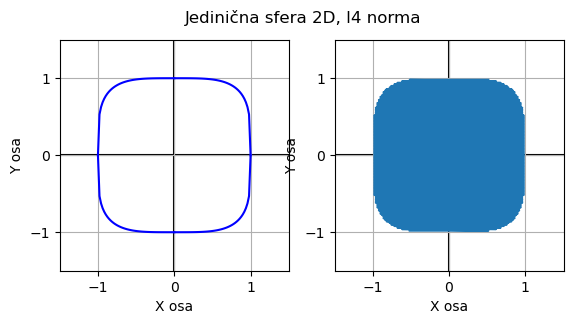

In [18]:
y=(1-x**4)**(1/4)
slika, ax = plt.subplots(1, 2,figsize=(6.5,3)) 
slika.suptitle('Jedinična sfera 2D, l4 norma')
slika.subplots_adjust(hspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

plt.subplot(1, 2, 2)
Zt=(np.abs(Xt)**4+np.abs(Yt)**4<=1)
plt.plot(Xt[Zt],Yt[Zt])
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

U slučaju $l_{\max}$ norme jedinični vektori su određeni jednakošću $\max\{|x|,|y|\}=1.$ Zbog toga jediničnu kružnicu čine odsečci pravih $x=\pm1$ i $y=\pm1.$

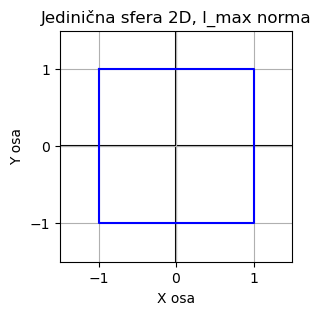

In [19]:
plt.figure(figsize=(3,3))
plt.title("Jedinična sfera 2D, l_max norma") 
plt.plot([-1,1,1,-1,-1],[1,1,-1,-1,1],'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

***

**Primer 3.** Potražićemo jedinične kružnice u 3D u odnosu na norme : $l_1,l_{3/2},l_2,l_4$ i $l_{\max}.$

Jediničnu kružnicu u odnosu na $l_1$ normu čine sledeći vektori $v=\begin{bmatrix}x&y&z\end{bmatrix}:$
$$\|v\|_1=|x|+|y|+|z|=1.$$
U prvom oktantu, gde je $x,y,z\geq0,$ to su vektori čije koordinate zadovoljavaju jednakost $x+y+z=1\quad\Longleftrightarrow\quad y=1-x-y.$ Krajnje tačke ovih vektora leže na ravni.

In [20]:
%matplotlib notebook 

In [21]:
x=np.linspace(0,1,200)

X,Y=np.meshgrid(x,x)

<IPython.core.display.Javascript object>


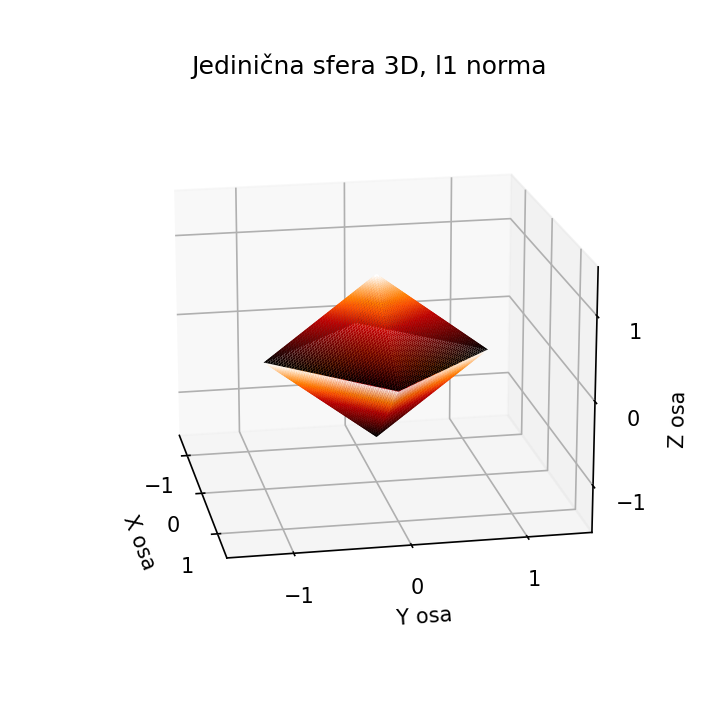

In [22]:
Z1=1-X-Y
Z1=np.ma.masked_where(Z1<0,Z1)

slika = plt.figure(figsize=plt.figaspect(1))
ax = slika.add_subplot(projection='3d')
plt.title("Jedinična sfera 3D, l1 norma") 
ax.plot_surface(X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,-Z1, cmap=cm.gist_heat)



ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa');

Jedinične sfere u 3D u odnosu na ostale norme opisujemo analogno.

<IPython.core.display.Javascript object>


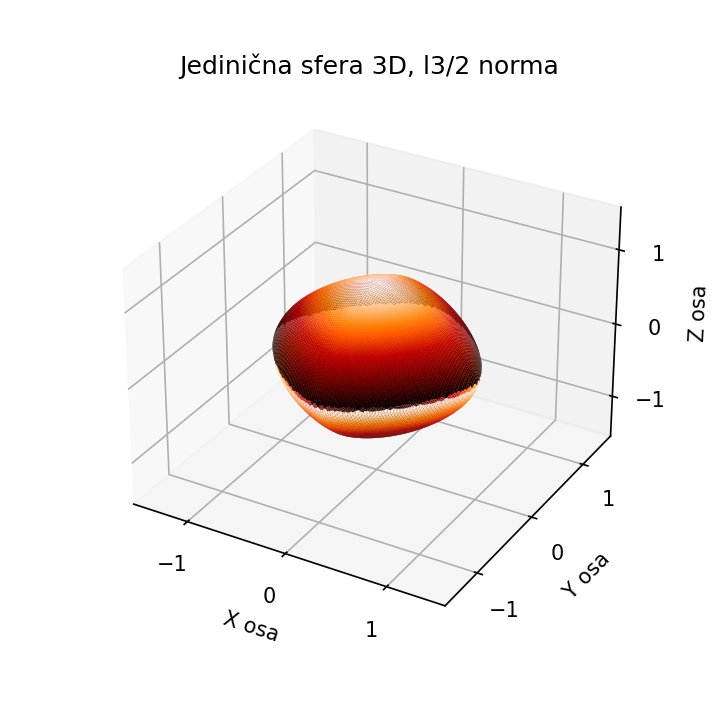

In [23]:
Z1=1-X**(3/2)-Y**(3/2)
Z1=(np.ma.masked_where(Z1<0,Z1))**(2/3)


slika = plt.figure(figsize=plt.figaspect(1))
ax = slika.add_subplot(projection='3d')
plt.title("Jedinična sfera 3D, l3/2 norma") 
ax.plot_surface(X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,-Z1, cmap=cm.gist_heat)



ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa');

<IPython.core.display.Javascript object>


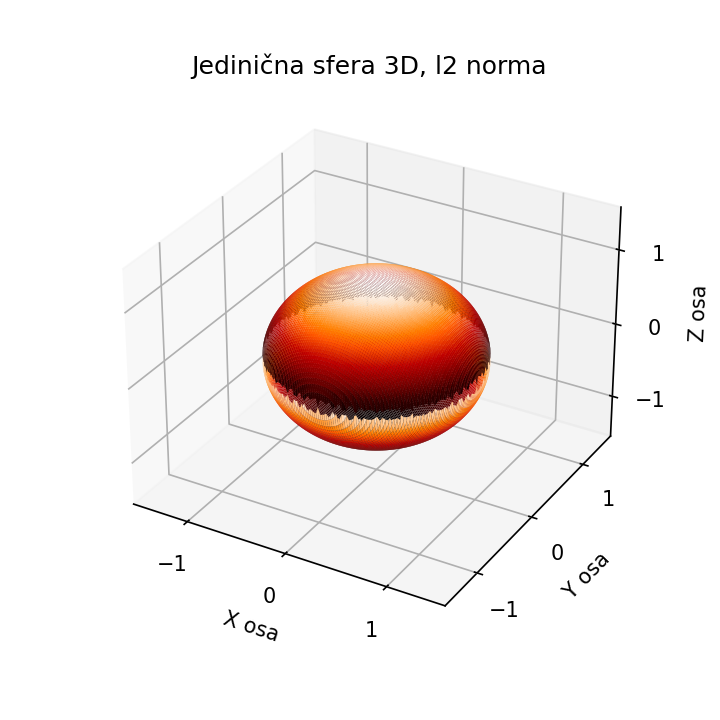

In [24]:
Z1=1-X**2-Y**2
Z1=(np.ma.masked_where(Z1<0,Z1))**(1/2)


slika = plt.figure(figsize=plt.figaspect(1))
ax = slika.add_subplot(projection='3d')
plt.title("Jedinična sfera 3D, l2 norma") 
ax.plot_surface(X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,-Z1, cmap=cm.gist_heat)



ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa');

<IPython.core.display.Javascript object>


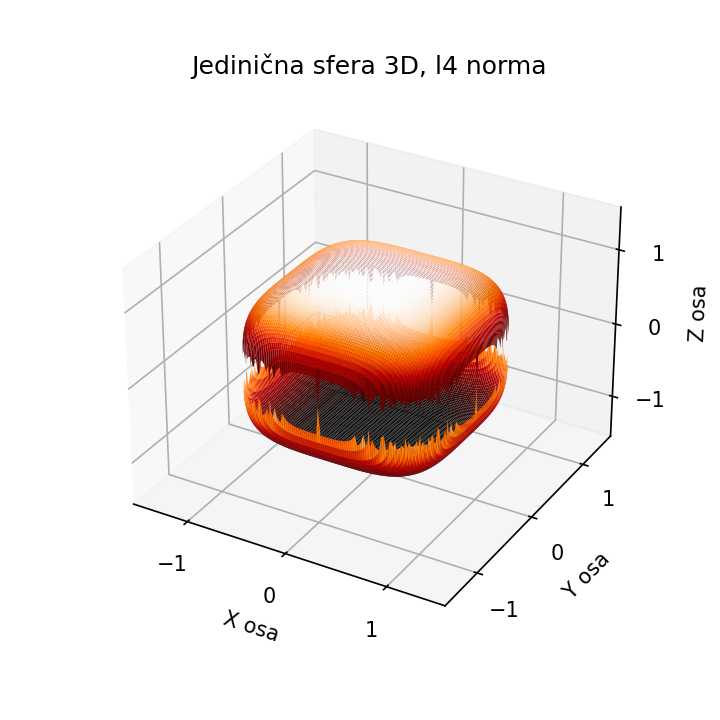

In [25]:
Z1=1-X**4-Y**4
Z1=(np.ma.masked_where(Z1<0,Z1))**(1/4)


slika = plt.figure(figsize=plt.figaspect(1))
ax = slika.add_subplot(projection='3d')
plt.title("Jedinična sfera 3D, l4 norma") 
ax.plot_surface(X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,-Z1, cmap=cm.gist_heat)


ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa');

<IPython.core.display.Javascript object>


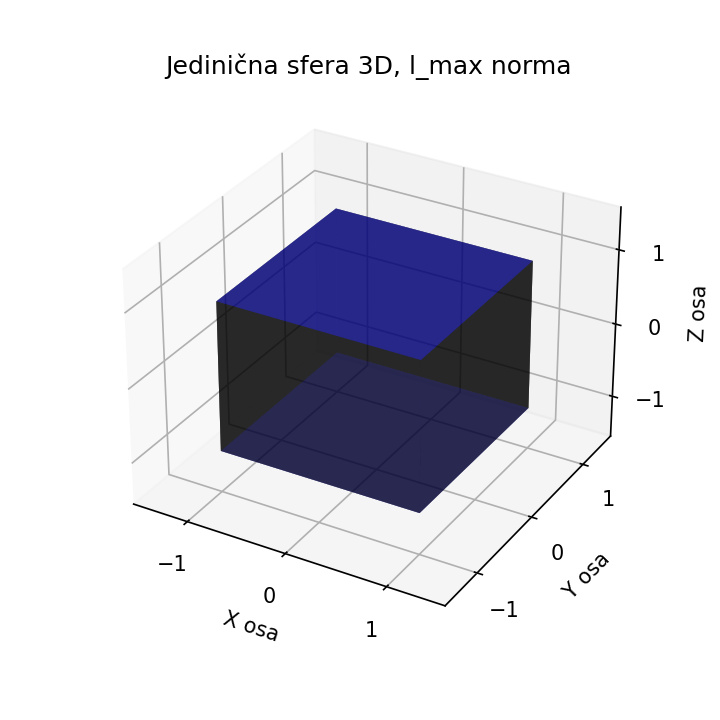

In [26]:
x=np.array([-1,1,1,-1])
X,Y=np.meshgrid(x,x)
Zh=np.ones((4,4))
c=0.2

slika = plt.figure(figsize=plt.figaspect(1))
ax = slika.add_subplot(projection='3d')
plt.title("Jedinična sfera 3D, l_max norma") 
ax.plot_surface(X,Y,Zh, color="b",alpha=c)
ax.plot_surface(X,Y,-Zh, color="b",alpha=c)
ax.plot_surface(Zh,Y,X, cmap=cm.gist_heat,alpha=c)
ax.plot_surface(-Zh,Y,X, cmap=cm.gist_heat,alpha=c)
ax.plot_surface(X,Zh,Y, cmap=cm.gist_heat,alpha=c)
ax.plot_surface(X,-Zh,Y, cmap=cm.gist_heat,alpha=c)
plt.xlabel('X osa')
plt.ylabel('Y osa')
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa');

In [27]:
%matplotlib inline  

***

Za izračunavanje $l_p$ normi vektora koristi se funkcija [`norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) iz  **linalg** biblioteke NumPy-a. Nejjednostavnija sintaksa je
>```python
numpy.linalg.norm(vektor[,ord=2])
>```

Argument **ord** je opcioni. Ukoliko je izostavljen funkcija vraća vrednost Euklidove norme za argument **vektor**. 
Dozvoljene vrednosti argumenta **ord** su bilo koja celobrojna vrednost, ili Python rezervisani simboli `inf` i `-inf`. Menhetn $(l_1)$ i max norma $(l_{\max})$ dobijaju se za vrednosti **ord=1** i **ord=inf**. Za celobrojne vrednosti  **ord**$<1$ ne dobijaju se norme, već funkcije komponenti vektora koje zovemo subnorme. Nose takvo ime jer ne zadovoljavaju neku od aksioma  norme. Više o tome biće rečeno u temi o konveksnosti. 

**Primer 4.** Izračunaćemo $l_1,$ $l_2$ i $l_{\infty}$ norme vektora $v$ i $u.$
$$v=\begin{bmatrix}1&1&-1&-1\end{bmatrix}^T,\qquad u=\begin{bmatrix}1+2j&2-1j&0&-2j\end{bmatrix}^T.$$

In [28]:
v=np.array([1,1,-1,-1])
u=np.array([1+2j,2-1j,0,-2j])
print("||v||2=",np.linalg.norm(v))  #Euklidova norma vektora
print("||u||2=",np.linalg.norm(u))  #Euklidova norma vektora

||v||2= 2.0
||u||2= 3.7416573867739413


In [29]:
print("||v||2=",np.linalg.norm(v,2))  #Euklidova norma vektora
print("||u||2=",np.linalg.norm(u,2))  #Euklidova norma vektora

||v||2= 2.0
||u||2= 3.7416573867739413


In [30]:
print("||v||1=",np.linalg.norm(v,1))  #Menhetn norma vektora
print("||u||1=",np.linalg.norm(u,1))  #Menhetn norma vektora

||v||1= 4.0
||u||1= 6.47213595499958


In [31]:
print("||v||max=",np.linalg.norm(v,np.inf))  #Max norma vektora
print("||u||max=",np.linalg.norm(u,np.inf))  #Max norma vektora

||v||max= 1.0
||u||max= 2.23606797749979


Osim pojedinačnih normi, funkcija `norm` može da se primeni i za izračunavanje normi istog tipa nad vrstama ili kolonama neke matrice. Dakle, dejstvo je omogućeno i za skupove vektora čime se norme ovih vektora paralelno izračunavaju.

In [32]:
A=np.arange(6).reshape(2,3)
print(A)
print(np.linalg.norm(A,axis=0))  #Euklidova norma vektora-kolona matrice A
print(np.linalg.norm(A,axis=1))  #Euklidova norma vektora-vrsta matrice A

[[0 1 2]
 [3 4 5]]
[3.         4.12310563 5.38516481]
[2.23606798 7.07106781]


In [33]:
print(np.linalg.norm(A,1,axis=0))  #Menhetn norma vektora-kolona matrice A
print(np.linalg.norm(A,1,axis=1))  #Menhetn norma vektora-vrsta matrice A

[3. 5. 7.]
[ 3. 12.]


In [34]:
print(np.linalg.norm(A,np.inf,axis=0))  #Max norma vektora-kolona matrice A
print(np.linalg.norm(A,np.inf,axis=1))  #Max norma vektora-vrsta matrice A

[3. 4. 5.]
[2. 5.]


***

**Primer 5.** Ispitaćemo uticaj povećanja dimenzije, tj. broja komponenti u vektoru na sadržaj normiranih vektora u odnosu na istaknute norme. Kreiraćemo matricu velikih dimenzija čiji su elementi slučajno izabrani. Kolone matrice normiraćemo u odnosu na tri istaknute norme $l_1,l_2,l_{\infty}.$

In [35]:
m=1000 #dimenzionalnost vektora
n=100 #broj vektora
A=rndm.normal(-5,15,(m,n))

Нормирамо најпре колоне у односу на $l_1$ норму.

In [36]:
A1=A/np.linalg.norm(A,1,axis=0)
print(np.linalg.norm(A1,1,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


Проверићемо карактеристике вредности појединачних компоненти вектора нормираних у односу на $l_1$ норму.

In [37]:
np.max(np.abs(A1))

0.005457920142510571

In [38]:
np.min(np.abs(A1))

1.6362278277183482e-08

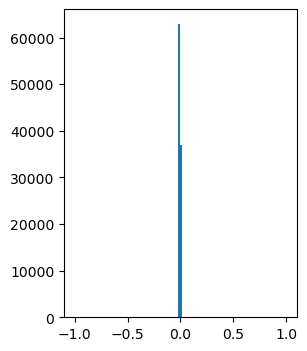

In [39]:
pom=A1.reshape(m*n,)
plt.figure(figsize=(3,4))
plt.hist(pom,bins=100,range=[-1,1]);

Нормирамо колоне у односу на $l_2$ норму и проверавамо карактеристике компоненти.

In [40]:
A2=A/np.linalg.norm(A,2,axis=0)
np.max(A2)

0.1184438410297723

In [41]:
np.min(A2)

-0.1352045185067756

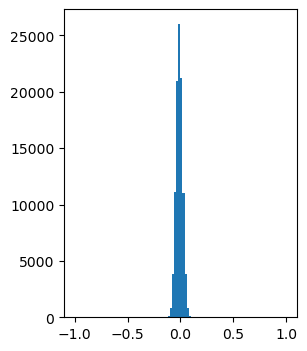

In [42]:
pom=A2.reshape(m*n,)
plt.figure(figsize=(3,4))
plt.hist(pom,bins=100,range=[-1,1]);

Нормирамо колоне у односу на $l_{\infty}$ норму и проверавамо карактеристике компоненти.

In [43]:
Ainf=A/np.linalg.norm(A,np.inf,axis=0)

In [44]:
np.max(Ainf)

1.0

In [45]:
np.min(Ainf)

-1.0

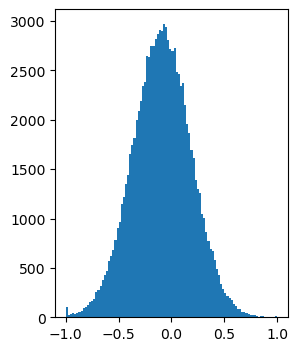

In [46]:
pom=Ainf.reshape(m*n,)
plt.figure(figsize=(3,4))
plt.hist(pom,bins=100,range=[-1,1]);

Kroz eksperiment uočavamo da normirani vektori $l_1$ norme grupišu komponente najbliže nuli. Za velike dimenzije normiranje u odnosu na $l_1$ normu kreira retko posednute vektore.

***

**Задатак 5.** Доказати да за све векторе $v\in\mathbb{C}^n$ важи да је 
	$$\|v\|_{\infty}\leq\|v\|_2\leq\|v\|_1.$$

**Решење :**

Означимо координате вектора $v\in\mathbb{C}^n$ са
$$v=\begin{bmatrix} x_0&x_1&\dots&x_{n-1}\end{bmatrix}^T.$$
\begin{align}
   \|v\|_{\infty}&=\displaystyle\max_{k}\{|x_k|\}=\sqrt{\left(\displaystyle\max_{k}\{|x_k|\}\right)^2}\leq
   \sqrt{\displaystyle\sum_{k\in(n)}|x_k|^2}=\|v\|_2\\
   &\leq\sqrt{\left(\displaystyle\sum_{k\in(n)}|x_k|\right)^2}\leq
   \displaystyle\sum_{k\in(n)}|x_k|=\|v\|_1.
\end{align}

***

**Задатак 6.** Показати да за три истакнуте норме $l_1,\ l_2$ и $l_{\infty}$ важи 
$$\forall p,q\in\{1,2,\infty\},\ p\neq q, \quad\|v\|_p\leq\alpha_{pq}\|v\|_q,\quad 
	[\alpha_{pq}]=\!\!\!\begin{array}{rl}
	& \phantom{i}1\phantom{ww} 2\phantom{wwi} \infty\\
	\begin{array}{r} 1\\2\\ \infty\end{array}\!\!\!&\!\!\!
	\begin{bmatrix} &\sqrt{n}&n\\
	1&&\sqrt{n}\\1&1&\end{bmatrix}
	\end{array}.$$
За које векторе се постиже једнакост у неједнакостима?    

**Решење :**

Означимо координате вектора $v\in\mathbb{R}^n$ са $v=\begin{bmatrix} x_0&x_1&\dots&x_{n-1}\end{bmatrix}^T.$

$\underline{p=1,\ q=2 :}$ Показаћемо да је $\|v\|_1\leq\sqrt{n}\|v\|_2.$
\begin{align}
\|v\|_1&=\displaystyle\sum_{k\in(n)}|x_k|=\displaystyle\sum_{k\in(n)}{\rm sgn}(x_k)x_k
         =|u\cdot v|, \mbox{ за }
         u=\begin{bmatrix}{\rm sgn}(x_0)&{\rm sgn}(x_1)&\dots&{\rm sgn}(x_{n-1})\end{bmatrix}^T,
\end{align}
где је ${\rm sgn}(x)\in\{-1,0,1\}.$ На основу Шварцове неједнакости је тада 
$$\|v\|_1=|u\cdot v|\leq\|u\|_2\,\|v\|_2\leq\sqrt{n}\|v\|_2.$$     

$\underline{p=1,\ q=\infty :}$ Показаћемо да је $\|v\|_1\leq n\|v\|_{\infty}.$
\begin{align}
         \|v\|_1&=\displaystyle\sum_{k\in(n)}|x_k|\leq\displaystyle\sum_{k\in(n)}\max\{|x_k|\}
         =n\max\{|x_k|\}= n\|v\|_{\infty}.
\end{align}     
     

$\underline{p=2,\ q=\infty :}$ Показаћемо да је $\|v\|_2\leq\sqrt{n}\|v\|_{\infty}.$
\begin{align}
         \|v\|_2&=\sqrt{\displaystyle\sum_{k\in(n)}x_k^2}
         \leq\sqrt{\displaystyle\sum_{k\in(n)}\max\{x_k\}^2}
         =\sqrt{n\max\{x_k\}^2}= \sqrt{n}\,\|v\|_{\infty}.
\end{align}       
     
$\underline{p=2,\ q=1\text{ и }p=\infty,\ q\in\{1,2\} :}$ задатак 5.

***

**Primer 6.** Funkcije $l_p:\ \|v\|_p=\left(\displaystyle\sum_{k=1}^n|x_k|^p\right)^{1/p}$ za $p<1$ nisu norme, ali ipak postoje kao opcije za izračunavanje. Tako npr. funkcija $l_0$ vraća broj nenula komponenti vektora $v,$ pa predstavlja meru retke posednutosti vektora.

In [47]:
v=rndm.randint(-1,1,(1000,))
np.linalg.norm(v,0)

489.0

In [48]:
np.count_nonzero(v)

489

Slično $l_{\infty}$ normi koja vraća maksimalnu apsolutnu vrednost komponenti vektora, funkcija $l_{-\infty}$ vraća minimalnu apsolutnu vrednost njegovih komponenti.

In [49]:
np.linalg.norm(v,np.infty)

1.0

In [50]:
np.linalg.norm(v,-np.infty)

0.0

***

**Primer 7.** Prikazaćemo "jedinične sfere" u odnosu na pseudo norme $l_p,\ p\in\{1/2,1/6,0,-1/2,-1,-2,-\infty\}$ u ravni.

In [51]:
x=np.linspace(0,1,50)

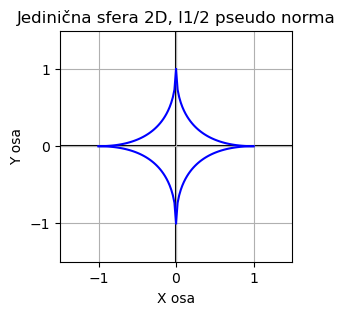

In [52]:
y=(1-x**(1/2))**2
plt.figure(figsize=(3,3))
plt.title("Jedinična sfera 2D, l1/2 pseudo norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

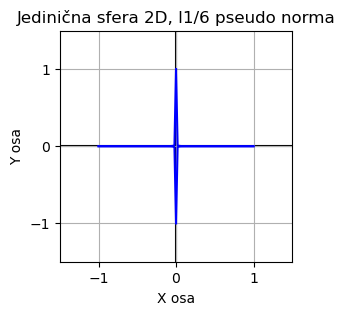

In [53]:
y=(1-x**(1/6))**6
plt.figure(figsize=(3,3))
plt.title("Jedinična sfera 2D, l1/6 pseudo norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

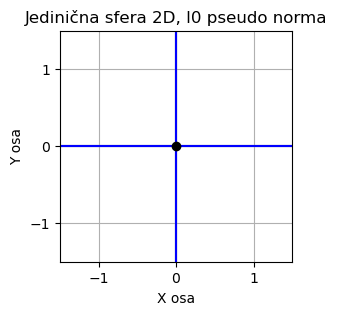

In [54]:
nula=np.array([0])
plt.figure(figsize=(3,3))
plt.title("Jedinična sfera 2D, l0 pseudo norma") 
plt.plot([-1.5,1.5],[0,0],'-b')
plt.plot([0,0],[-1.5,1.5],'-b')
plt.scatter(nula,nula,c='black', zorder=3)
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

Funkcija $l_p$ za negativne vrednosti parametra $p$ menja svoj domen. Na primer za $p=-1/2$ i vektor $v=\begin{bmatrix}x&y\end{bmatrix}\in\mathbb{R},$ imamo
$$l_{-1/2}(v)=1\quad\Longleftrightarrow\quad 
\big(|x|^{-1/2}+|y|^{-1/2}\big)^{-2}=1
\quad\Longleftrightarrow\quad
\dfrac{1}{\sqrt{|x|}}+\dfrac{1}{\sqrt{|y|}}=1
$$
$$\quad\Longrightarrow\quad |x|,|y|>1.
$$

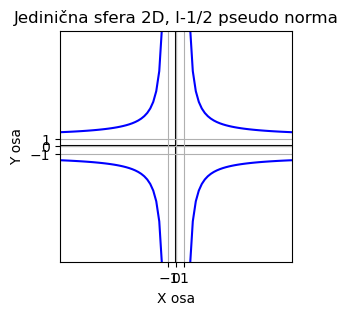

In [55]:
x=np.linspace(1+1e-10,20,50)
y=(1-x**(-1/2))**(-2)
plt.figure(figsize=(3,3))
plt.title("Jedinična sfera 2D, l-1/2 pseudo norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

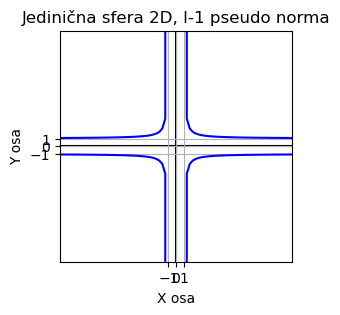

In [56]:
x=np.linspace(1+1e-10,20,50)
y=1/(1-1/x)
plt.figure(figsize=(3,3))
plt.title("Jedinična sfera 2D, l-1 pseudo norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

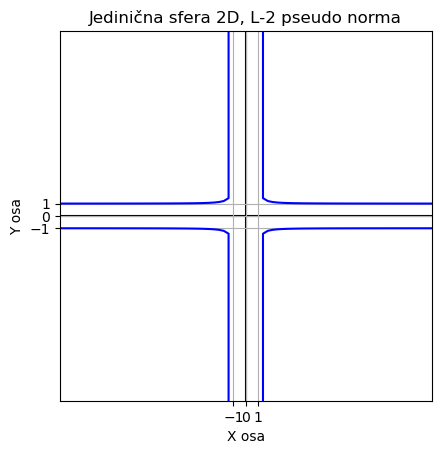

In [57]:
x=np.linspace(1+1e-10,20,50)
y=(1-x**(-2))**(-1/2)
plt.figure(figsize=plt.figaspect(1))
plt.title("Jedinična sfera 2D, L-2 pseudo norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

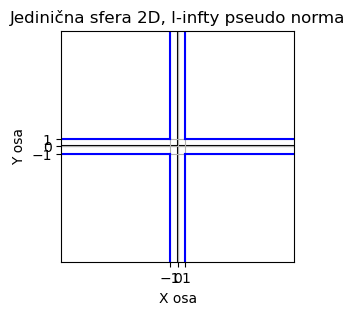

In [58]:
x=np.array([1,1])
y=np.array([1,15])
plt.figure(figsize=(3,3))
plt.title("Jedinična sfera 2D, l-infty pseudo norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.plot(y,x,'b')
plt.plot(-y,x,'b')
plt.plot(y,-x,'b')
plt.plot(-y,-x,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

***

## Норме матрица

Видели смо да се скаларни производ на скупу правоугаоних матрица веома природно уводи векторизовањем ових дводимезионалних објеката. За две матрице $A,B\in\mathcal{M}_{m\times n},$ са елементима $A=[a_{ij}],\ B=[b_{ij}]$ скаларни производ је 
$$A\cdot B=\sum_{i\in(m)}\sum_{j\in(n)}a_{ij}b_{ij}={\rm tr}(A^TB)={\rm tr}(AB^T).$$

Норма матрица индукована овим скаларним производом назива се [**Фробенијусова норма**](https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm) (Frobenius norm).
$$\|A\|_{F}=\sqrt{A\cdot A}=\sqrt{\sum_{i\in(m)}\sum_{j\in(n)}a_{ij}^2}.$$

**Пример 8.** Уграђена функција `linalg.norm` омогућава израчунавање и норми матрица.

In [59]:
A=np.arange(6).reshape(2,3)
np.linalg.norm(A,'fro')  #Frobenijusova norma

7.416198487095663

Још један начин тумачења овог израза јесте кроз векторе-врста и векторе-колона матрице $A.$ Уколико означимо елементе ових скупова вектора матрице $A$ 
$$A=\left[\begin{array}{c|c|c|c}
	\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
	u_0&u_1&\dots&u_{n-1}\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
	\end{array}\right]=
\left[\begin{array}{c}
\phantom{WW}v_0^T\phantom{WW}\\\hline
\phantom{WW}v_1^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}v_{m-1}^T\phantom{WW}
\end{array}\right],$$ 
Фробенијусова норма је тада Еуклидова норма вектора Еуклидових норми вектора-врста или вектора-колона,
$$\|A\|_F=\sqrt{\|u_0\|^2+\|u_1\|^2+\dots+\|u_{n-1}\|^2}=\sqrt{\|v_0\|^2+\|v_1\|^2+\dots+\|v_{m-1}\|^2}.$$

In [60]:
np.linalg.norm(np.linalg.norm(A,2,axis=0))

7.416198487095663

In [61]:
np.linalg.norm(np.linalg.norm(A,2,axis=1))

7.416198487095664

***

**Пример 9.** По угледу на $l_p$ норме вектора можемо да креирамо и мешовите норме матрица. Најпре се дуж нпр. колона матрице примени једна $l_p$ норма. Након тога се примени поново нека $l_p$ норма на вектор добијених резултата. 

За матрицу $A=\begin{bmatrix} 1&2&3\\-1&0&2\end{bmatrix}$ на сваку од колона применимо нпр. $l_1$ норму. 

In [62]:
A=np.array([[1,2,3],[-1,0,2]])
v=np.linalg.norm(A,1,axis=0)
v

array([2., 2., 5.])

Резултат је вектор-врста норми сваке од колона,
$$v=\begin{bmatrix}1+|-1|&2+0&3+2\end{bmatrix}=\begin{bmatrix}2&2&5\end{bmatrix}.$$ 
Сада на вектор $v$ можемо да применимо, нпр. $l_2$ норму и  то прогласимо нормом матрице $A,$
$$\|A\|_{1,2}=\sqrt{2^2+2^2+5^2}=\sqrt{33}.$$
Норме овог типа зовемо мешовите норме матрица.

In [63]:
np.linalg.norm(v,2) , np.sqrt(33)

(5.744562646538029, 5.744562646538029)

Слично налазимо $l_{2,1}$ као и $l_{1,1}$ норму матрице $A.$	

In [64]:
np.linalg.norm(np.linalg.norm(A,2,axis=0),1)

7.019764837837084

In [65]:
np.linalg.norm(np.linalg.norm(A,1,axis=0),1)

9.0

Комбинација $l_1$ и $l_{\infty}$ норме даје $l_{1,\infty}$ матричну норму која рачуна максималну суму модула компоненти вектора-колона матрице. У случају матрице $A$ је
$$\|A\|_{1,\infty}=\|v\|_{\infty}=5.$$

In [66]:
np.linalg.norm(np.linalg.norm(A,1,axis=0),np.inf)

5.0

Ако два пута применимо $l_{\infty}$ норму добијамо одговарајућу члан-по-члан $l_{\infty,\infty}$ норму за матрице.
$$A=[a_{ij}]\in\mathcal{M}_{m\times n},\quad \|A\|_{\infty,\infty}=\max_{i,j}\{|a_{ij}|\}.$$
За матрицу $A=\begin{bmatrix} 1&2&3\\-1&0&2\end{bmatrix}$ је тада $\|A\|_{\infty,\infty}=3.$

In [67]:
np.linalg.norm(np.linalg.norm(A,np.inf,axis=0),np.inf)

3.0

***

Фробенијусова норма и мешовите норме су два начина формирања норми матрица. Постоје и други начини дефинисања матричне норме. Упознаћемо их након обраде битних факторизација матрица. Њихове наговештаје можемо да видимо кроз уграђене функције NumPy библиотеке.

In [68]:
np.linalg.norm(A,1), np.linalg.norm(A,2), np.linalg.norm(A,np.inf)

(5.0, 4.02825173289069, 6.0)

Кључ је у повезивању норме са најважнијом операцијом над матрицама - са множењем матрица.

***

**Лема 2.** Нека је $A\in\mathcal{M}_{m\times n}$ матрица и $v\in\mathbb{R}^n,$ и $\|\cdot\|$ ознака за Еуклидову норму вектора, а $\|\cdot\|_F$ ознака Фробенијусове норме. Тада за Фробенијусову норму важи
$$\|Av\|\leq\|A\|_F\|v\|,\tag{2}$$

$$\|AB\|_F\leq\|A\|_F\,\|B\|_F.\tag{3}$$

Особину $(2)$ зовемо слагање Фробенијусове норме са Еуклидовом нормом. Особина $(3)$ је субмултипликативност Фробенијусове норме.

**Доказ :**

Означимо компоненте матрице $A=[a_{ij}]$ и вектора $v=[x_i]_{n\times 1}.$ Тада је $i-$та компонента вектора $Av$ дата са $(Av)_i=\displaystyle\sum_{j\in(n)}a_{ij}x_j.$ Због тога целокупан вектор $Av$ гласи
$$Av=\begin{bmatrix} \displaystyle\sum_{j\in(n)}a_{0j}x_j\\
	\displaystyle\sum_{j\in(n)}a_{1j}x_j\\ \vdots\\
	\displaystyle\sum_{j\in(n)}a_{m-1\,j}x_j\end{bmatrix}.$$

Следи да је $\|Av\|^2=\displaystyle\sum_{i\in(m)} \left(\sum_{j\in(n)}a_{ij}x_j\right)^2.$ 
Имајући у виду Шварцову неједнакост $$|\langle v,u\rangle|\leq\|v\|\ \|u\|\quad\Longleftrightarrow\quad 
|\langle v,u\rangle|^2\leq\|v\|^2\ \|u\|^2,$$ 
за све $i\in(m),$ имамо
$$\left(\sum_{j\in(n)}a_{ij}x_j\right)^2
	\leq\left(\sum_{j\in(n)}a_{ij}^2\right)
	\left(\sum_{j\in(n)}x_{j}^2\right)=
	\left(\sum_{j\in(n)}a_{ij}^2\right)\|v\|^2.$$
Сумирањем по $i\in(m),$ лако долазимо до неједнакости
$$\|Av\|^2\leq\left(\displaystyle\sum_{i\in(m)}\sum_{j\in(n)}a_{ij}^2\right)\|v\|^2=
	\|A\|_{F}^2\|v\|^2.$$  

Уведимо ознаке вектора-колона матрице $B:$
$$B=\left[\begin{array}{c|c|c|c}
	\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
	v_0&v_1&\dots&v_p\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
	\end{array}\right]$$

С обзиром да за сваку колону матрице $B$ важи претходно показана неједнакост $(2),$ имамо
\begin{align}
\|AB\|_F^2&=\displaystyle\sum_{j\in[p]}\|Av_j\|^2\leq\displaystyle\sum_{j\in[p]}\|A\|_F^2\|v_j\|^2
=\|A\|_F^2\displaystyle\sum_{j\in[p]}\|v_j\|^2
=\|A\|_F^2\|B\|_F^2
\quad\Box
\end{align}

***

## Базе векторских простора

Векторски простори којима смо се до сада углавном бавили били су коначно димензионални. Они су погодни за рад због њихове везе са матричним операцијама.

Свака регуларна матрица може се сматрати матрицом промене базе векторског простора $\mathbb{R}^n,$ или у општем случају простора $\mathbb{C}^n.$ Нека је $A\in\mathcal{M}_{n\times n}$ матрица координата вектора неке базе 
$$(a):\ a_0,a_1,\dots,a_{n-1},$$ 
простора $\mathbb{R}^n$ задатих у природној бази $(e):\ e_0,e_1,\dots,e_{n-1}.$ За вектор $v$ задат координатама у бази $(a),$ што ћемо означавати са 
$$[v]_{(a)}=\begin{bmatrix} x_0&x_1&\dots&x_{n-1}\end{bmatrix}^T_{(a)},$$ 
производ
$$A[v]_{(a)}=\begin{bmatrix}
\begin{bmatrix} \phantom{a}\\a_0\\ \phantom{a}\end{bmatrix}&
\begin{bmatrix} \phantom{a}\\a_1\\ \phantom{a}\end{bmatrix}&\dots&
\begin{bmatrix} \phantom{a}\\a_{n-1}\\ \phantom{a}\end{bmatrix}\end{bmatrix}
\begin{bmatrix} x_0\\x_1\\\vdots\\x_{n-1}\end{bmatrix}_{(a)}
=x_0\begin{bmatrix} \phantom{a}\\a_0\\ \phantom{a}\end{bmatrix}
+x_1\begin{bmatrix} \phantom{a}\\a_1\\ \phantom{a}\end{bmatrix}+\dots
+x_{n-1}\begin{bmatrix} \phantom{a}\\a_{n-1}\\ \phantom{a}\end{bmatrix}$$
представља нумерички поступак израчунавања координата вектора $v$ у природној бази $(e),$ тј. $[v]_{(e)}\equiv v.$  Тако се добијају координате приликом преласка са репрезентације вектора у бази $(a)$ на репрезентацију вектора у бази $(e).$   Због тога регуларну матрицу $A$ називамо матрицом преласка са базе $(a)$ на природну базу $(e)$ простора $\mathbb{R}^n.$ 

Пратећи аналогију, инверзна матрица $A^{-1}$ у таквом контексту представља прелазак са природне базе $(e)$ на базу $(a).$ Колоне матрице $A^{-1}$ садрже координате вектора природне базе $(e)$ изражене преко вектора базе $(a).$ 
Када је вектор $v$ представљен координатама у бази $(e),$ производом 
$$A^{-1}v\equiv A^{-1}[v]_{(e)}=[v]_{(a)}$$ 
израчунавамо коордимате вектора $v$ у бази $(a).$
Дакле, $A^{-1}v$ представља вектор коефицијената развоја вектора $v$ у бази колона матрице $A.$ Због отга свако решавање система линеарних једначина $Ax=v$ је еквивалент проблему потраге за координатама вектора $v$ у бази вектора-колона матрице $A.$  

<div>
   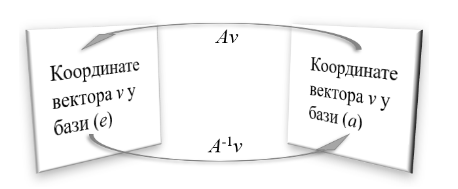  
</div>

Осим коначнодимензионалних векторских простора постоје и векторски простори без коначних база. Њих зовемо бесконачно димензионални векторски простори. Најзначајнији пример ових простора јесу функције, а међу њима полиноми и тригонометријски полиноми. На полиномима смо упознали Хамелове базе векторских простора. Њихова карактеристика јесте представљање свих вектора са коначно много не нула координата.

**Дефиниција 5.** Скуп вектора $(b)\subset V$ векторског простора $V$ је [*Хамелова база*](https://en.wikipedia.org/wiki/Basis_(linear_algebra)#Hamel_basis) ако има следеће две особине:
1. Било који коначан подскуп $b_0,b_1,\dots,b_k\in(b),\ k\geq0$ је линеарно независан, тј.
$$\lambda_0b_0+\lambda_1b_1+\dots+\lambda_kb_k=\theta\ \Longrightarrow\ \lambda_i=0,\ \forall i.$$
2. Вектори скупа $(b)$ чине потпун систем вектора, тј. за произвољан вектор $v\in V$ постоји коначан подскуп вектора $b_0,b_1,\dots,b_k\in(b),\ k\geq0$ тако да је $v$ представив преко њих       
$$v=\alpha_0b_0+\alpha_1b_1+\dots+\alpha_kb_k.$$

Коефицијенти $\alpha_i$ у представљању $v=\alpha_0b_0+\alpha_1b_1+\dots+\alpha_kb_k$ су јединствено одређени базом $(b)$ и зовемо их координате вектора $v$ у односу на Хамелову базу. 

**Пример 10.** Функције једне или више променљивих $\mathcal{F}[t],\ \mathcal{F}[t_1,t_2,\dots,t_n]\equiv\mathcal{F}[v]$ представљају елементе векторског простора захваљујући операцијама:
\begin{align}
f,g\in&\ \mathcal{F}[v],\\[8pt]
    (f+g)(v)=f(v)+g(v),&\qquad\qquad
    (\alpha f)(v)=\alpha f(v).
\end{align}  
Нула-вектор је нула-функција $O(v)=0,\ \forall v.$

Испитивање линеарне независности коначног скупа диференцијабилних функција
    $\varphi_0(t),\varphi_1(t),\dots,\varphi_n(t)$ једне реалне променљиве $t$ може да се понекад олакша употребом извода. Посматрамо једнакост
$$\alpha_0\varphi_0(t)+\alpha_1\varphi_1(t)+\dots+\alpha_n\varphi_n(t)=0,\quad \forall t.$$

Диференцирањем ове једнакости $n$ пута добијамо систем једначина по коефицијентима $\alpha_i:$
$$\begin{cases}\alpha_0\varphi_0(t)+\alpha_1\varphi_1(t)+\dots+\alpha_n\varphi_n(t)=0,\\
    \alpha_0\varphi_0'(t)+\alpha_1\varphi_1'(t)+\dots+\alpha_n\varphi_n'(t)=0,\\
    \alpha_0\varphi_0''(t)+\alpha_1\varphi_1''(t)+\dots+\alpha_n\varphi_n''(t)=0,\\
    \vdots\\
    \alpha_0\varphi_0^{(n)}(t)+\alpha_1\varphi_1^{(n)}(t)+\dots+\alpha_n\varphi_n^{(n)}(t)=0,\\
    \end{cases}\quad \forall t.$$    

Заменом неке конкретне вредности $t=t_0$ у горњи систем он постаје хомоген систем линеарних једначина по непознатим коефицијентима $\alpha_0,\alpha_1,\dots,\alpha_n.$ Решење квадратног хомогеног система ће бити јединствено ако је детерминанта система различита од нуле. Због тога, детерминанта која носи име [Вронскијан](https://en.wikipedia.org/wiki/Wronskian#The_Wronskian_and_linear_independence), служи приликом испитивања линеарне независности функција,
$$W(\varphi_0,\varphi_1,\dots,\varphi_n)=\begin{vmatrix}
    \varphi_0(t)&\varphi_1(t)&\dots&\varphi_n(t)\\
    \varphi_0'(t)&\varphi_1'(t)&\dots&\varphi_n'(t)\\
    \vdots&\vdots&&\vdots\\
    \varphi_0^{(n)}(t)&\varphi_1^{(n)}(t)&\dots&\varphi_n^{(n)}(t)
    \end{vmatrix}.$$

Посматраћемо полиноме стандардне базе $1,x,\dots,x^n$ и потражићемо Вронскијан ових функција.
\begin{align}
W&=\begin{vmatrix}1&x&x^2&\dots&x^{n-1}&x^n\\
0&1&2x&\dots&(n-1)x^{n-2}&nx^{n-1}\\
0&0&2!&\dots&(n-1)(n-2)x^{n-3}&n(n-1)x^{n-2}\\
\vdots&\vdots&\vdots&&\vdots&\vdots\\
0&0&0&\dots&(n-1)!&n!x\\
0&0&0&\dots&0&n!
\end{vmatrix}=2!\cdot3!\cdots n!\neq0
\end{align}

С обзиром да је вредност Вронскијана различита од нуле, потврђујемо да су функције стандардне полиномске базе линеарно независне.

***

**Теорема 1.** (Основни став алгебре)

Полином $P_n(t)\in\mathbb{P}_n[t]$ степена $n\geq0$ има тачно $n$ нула у пољу комплексних бројева. 

**Последица 1.** Уколико се два полинома $P(t),Q(t)\in\mathbb{P}_n[t]$ поклапају у не мање од $n+1$ различитих тачака онда су они једнаки.
$$P(x_k)=Q(x_k),\ k=0,1,\dots,n\qquad\Longrightarrow\qquad P(t)=Q(t),\ \forall t.$$

**ДОКАЗ :** Посматрамо полином $S(t)=P(t)-Q(t).$ Како је $S$ разлика два полинома степена не већег од $n,$ то је и $S$ полином степена не већег од $n.$ Према основном ставу алгебре полином $S$ има највише $n$ нула. Међутим, $S$ има бар $n+1$ различиту нулу
$$S(x_k)=P(x_k)-Q(x_k)=0,\quad k=0,1,\dots,n.$$
Закључујемо да он мора бити нула-полином$.\Box$

***

**Пример 11.** Показаћемо линеарну независност неких скупова полинома користећи последицу основног става алгебре. Нула-вектор у простору полинома је нула-полином $O(t)=0,\ \forall t.$ Линеарна независност скупа полинома $\{P_0,P_1,\dots,P_k\}$ дефинисана је импликацијом:
$$c_0P_0(t)+c_1P_1(t)+\dots+c_kP_k(t)=O(t)=0,\quad \forall t\quad
\Longrightarrow\quad c_0=c_1=\dots=c_k.$$

Скупови полинома су:

а) $\{1,t,t^2\}$

б) $\left\{\dfrac{(t-a)(t-b)}{(c-a)(c-b)}\,,\dfrac{(t-a)(t-c)}{(b-a)(b-c)}\,,\dfrac{(t-b)(t-c)}{(a-b)(a-c)}\right\},$ $a,b,c$ су бројеви различити међу собом

в) $\{1,t-a,(t-a)(t-b)\}$

г) $\big\{(1-t)^3,t(1-t)^2,t^2(1-t),t^3\big\}$

а) Нека је $c_0+c_1t+c_2t^2=0,\ \forall t.$ Потребно је да одредимо три непозната коефицијента. За то су нам потребне три једначине. Формирамо их избором неке три различите вредности аргумента $t,$ рецимо $t=0,1,2.$
$$
\begin{cases}
c_0+c_1\cdot0+c_2\cdot0^2=0,\\
c_0+c_1\cdot1+c_2\cdot1^2=0,\\
c_0+c_1\cdot2+c_2\cdot2^2=0,\\
\end{cases}\quad\Longleftrightarrow\quad
\begin{cases}
c_0=0,\\
c_0+c_1+c_2=0,\\
c_0+2c_1+4c_2=0,\\
\end{cases}
\Longrightarrow
\begin{cases}
c_0=0,\\
c_1=0,\\
c_2=0.\\
\end{cases}
$$
Добили смо хомоген систем једначина који има јединствено решење, оно тривијално. Потврђујемо тиме линеарну независност полинома мономске базе.

б) За испитивање линеарне независности скупа полинома $\left\{\dfrac{(t-a)(t-b)}{(c-a)(c-b)}\,,\dfrac{(t-a)(t-c)}{(b-a)(b-c)}\,,\dfrac{(t-b)(t-c)}{(a-b)(a-c)}\right\}$ можемо поново да бирамо насумично вредности аргумента $t,$ или да користимо познавање њихове факторизације за убрзани процес израчунавања.
$$c_0\dfrac{(t-a)(t-b)}{(c-a)(c-b)}+c_1\dfrac{(t-a)(t-c)}{(b-a)(b-c)}+c_2\dfrac{(t-b)(t-c)}{(a-b)(a-c)}=0,\ \forall t.$$

\begin{align}
t=a:\quad&\quad c_0\dfrac{(a-a)(a-b)}{(c-a)(c-b)}+c_1\dfrac{(a-a)(a-c)}{(b-a)(b-c)}+c_2\dfrac{(a-b)(a-c)}{(a-b)(a-c)}=0
\quad\Longrightarrow\quad c_2\dfrac{(a-b)(a-c)}{(a-b)(a-c)}=c_2=0,\\
t=b:\quad&\quad c_0\dfrac{(b-a)(b-b)}{(c-a)(c-b)}+c_1\dfrac{(b-a)(b-c)}{(b-a)(b-c)}+c_2\dfrac{(b-b)(b-c)}{(a-b)(a-c)}=0
\quad\Longrightarrow\quad c_1\dfrac{(b-a)(b-c)}{(b-a)(b-c)}=c_1=0,\\
t=c:\quad&\quad c_0\dfrac{(c-a)(c-b)}{(c-a)(c-b)}+c_1\dfrac{(c-a)(c-c)}{(b-a)(b-c)}+c_2\dfrac{(c-b)(c-c)}{(a-b)(a-c)}=0
\quad\Longrightarrow\quad c_0\dfrac{(c-a)(c-b)}{(c-a)(c-b)}=c_0=0
\end{align}

в) Факторисани облик је помоћ и у случају скупа полинома $\{1,t-a,(t-a)(t-b)\}$
\begin{align}
&c_0+c_1(t-a)+c_2(t-a)(t-b)=0,\quad \forall t,\\
t=a:\quad&\quad c_0+c_1(a-a)+c_2(a-a)(a-b)=0\quad\Longrightarrow\quad c_0=0,\\
t=b:\quad&\quad c_0+c_1(b-a)+c_2(b-a)(b-b)=0\quad\Longrightarrow\quad c_1(b-a)=0\quad\Longrightarrow\quad c_1=0,\\
t=0:\quad&\quad c_0+c_1(0-a)+c_2(0-a)(0-b)=0\quad\Longrightarrow\quad abc_2=0\quad\Longrightarrow\quad c_2=0.
\end{align}

г) Полиноми скупа $\big\{(1-t)^3,t(1-t)^2,t^2(1-t),t^3\big\}$ су дати у факторисаном облику, али имају вишеструке нуле. С обзиром да су полиноми диференцијабилне функције и да за вишеструке нуле важи:
$$P(x)=(x-\alpha)^kQ(x)\quad\Longrightarrow\quad P'(x)=(x-\alpha)^{k-1}Q_1(x),$$
за брже информације о коефицијентима користићемо изводе.

Кренемо од основне једнакости 
$$c_0P_0(t)+c_1P_1(t)+\dots+c_nP_n(t)=0,\quad \forall t,$$
њеним узастопним диференцирањем $n$ пута добијемо систем једначина
$$\begin{cases}        
c_0P_0(t)+c_1P_1(t)+\dots+c_nP_n(t)=0,\\
c_0P_0'(t)+c_1P_1'(t)+\dots+c_nP_n'(t)=0,\\
c_0P_0''(t)+c_1P_1''(t)+\dots+c_nP_n''(t)=0,\\
\vdots\\
c_0P_0^{(n)}(t)+c_1P_1^{(n)}(t)+\dots+c_nP_n^{(n)}(t)=0,\\
\end{cases}\quad \forall t.$$

Можемо да користимо такав хомоген систем једначина и својство јединствености решења, или да комбинујемо диференцирање и добар избор чворова.

\begin{align}
&c_0(1-t)^3+c_1t(1-t)^2+c_2t^2(1-t)+c_3t^3=0,\quad\forall t,\\
t=0:\quad&\quad c_0=0,\qquad t=1:\quad\quad c_3=0,\\
&c_1t(1-t)^2+c_2t^2(1-t)=0\ \big/'\qquad c_1\big((1-t)^2-2t(1-t)\big)+c_2\big(2t(1-t)-t^2\big)=0\\
t=0:\quad&\quad c_1=0,\qquad t=1:\quad\quad c_2=0.
\end{align}

***

**Пример 12.** Полиноми $B_0(t)=(1-t)^3,\ B_1(t)=3t(1-t)^2,\ B_2(t)=3t^2(1-t),\ B_3(t)=t^3$ зову се Бернштајнови полиноми трећег степена. Одредићемо њихов стандардни облик, тј. координате у мономској бази $\{t^3,t^2,t,1\}.$

Један начин да то постигнемо је Биномна формула и класично множење: 
\begin{align}
(1-t)^3&=-t^3+3t^2-3t+1=\begin{bmatrix}-1\\3\\-3\\1\end{bmatrix},\quad 
&&3t(1-t)^2=3t(1-2t+t^2)=3t^3-6t^2+3t=\begin{bmatrix}3\\-6\\3\\0\end{bmatrix},\\
3t^2(1-t)&=-3t^3+3t^2=\begin{bmatrix}-3\\3\\0\\0\end{bmatrix},\quad
&&t^3=\begin{bmatrix}1\\0\\0\\0\end{bmatrix}.
\end{align}

Матрица преласка из Бернштајнове базе у базу монома због тога гласи
$B=\begin{bmatrix}-1&3&-3&1\\ 3&-6&3&0\\ -3&3&0&0\\ 1&0&0&0\end{bmatrix},$
$$\begin{bmatrix}B_0(t)\\B_1(t)\\B_2(t)\\B_3(t)\end{bmatrix}=
\begin{bmatrix}-1&3&-3&1\\ 3&-6&3&0\\ -3&3&0&0\\ 1&0&0&0\end{bmatrix}
\begin{bmatrix}t^3\\t^2\\t\\1\end{bmatrix}.$$
Уколико је неки полином $P(t)=a_0B_0(t)+a_1B_1(t)+a_2B_2(t)+a_3B_3(t),$ тада су координате полинома $P$ у мономској бази дате матричним изразом
$$\begin{bmatrix}-1&3&-3&1\\ 3&-6&3&0\\ -3&3&0&0\\ 1&0&0&0\end{bmatrix}
\begin{bmatrix}a_0\\a_1\\a_2\\a_3\end{bmatrix}.$$

Инверзна матрица матрице $B$ је матрица преласка из мономске (стандардне базе) у базу Бернштајнових полинома.

In [69]:
B=np.array([[-1,3,-3,1],[3,-6,3,0],[-3,3,0,0],[1,0,0,0]])
np.round(np.linalg.inv(B),3)

array([[ 0.   ,  0.   ,  0.   ,  1.   ],
       [-0.   ,  0.   ,  0.333,  1.   ],
       [-0.   ,  0.333,  0.667,  1.   ],
       [ 1.   ,  1.   ,  1.   ,  1.   ]])

**Пример 13.** Полиноми $H_k\in\mathbb{P}_3[t],\ k=0,1,2,3$ описани су следећим условима:
\begin{align}
&H_0(0)=1, && H_0'(0)=0, && H_0(1)=0, && H_0'(1)=0,\\
&H_1(0)=0, && H_1'(0)=1, && H_1(1)=0, && H_1'(1)=0,\\
&H_2(0)=0, && H_2'(0)=0, && H_2(1)=1, && H_2'(1)=0,\\
&H_3(0)=0, && H_3'(0)=0, && H_3(1)=0, && H_3'(1)=1.
\end{align}
Потражићемо координате ових полинома у односу на мономску базу $\{t^3,t^2,t,1\}.$

\begin{align}
&H_0(t)=c_0t^3+c_1t^2+c_2t+c_3\\
H_0(0)=1:&\quad\Longrightarrow\quad c_3=1,\qquad H_0(1)=0:\quad\Longrightarrow\quad c_0+c_1+c_2+c_3=0
\quad\Longrightarrow\quad c_0+c_1+c_2=-1,\\
&H_0'(t)=3c_0t^2+2c_1t+c_2\\
H_0'(0)=0:&\quad\Longrightarrow\quad c_2=0,\qquad H_0'(1)=0:\quad\Longrightarrow\quad 3c_0+2c_1+c_2=0
\quad\Longrightarrow\quad 3c_0+2c_1=0
\end{align}

Остаје да се реши систем једначина $\begin{cases}c_0+c_1=-1\\3c_0+2c_1=0\end{cases}\quad\Longrightarrow\quad 
\begin{cases}c_0=2\\c_1=-3\end{cases},$
$$H_0(t)=2t^3-3t^2+1=\begin{bmatrix}2\\-3\\0\\1\end{bmatrix}.$$

In [70]:
np.linalg.solve([[1,1],[3,2]],[-1,0])

array([ 2., -3.])

Аналогно одређујемо координате преосталих полинома. Координате ових полинома су колоне наредне матрице.

In [71]:
I=np.eye(4)
H=np.linalg.solve([[0,0,0,1],[0,0,1,0],[1,1,1,1],[3,2,1,0]],I)
H

array([[ 2.,  1., -2.,  1.],
       [-3., -2.,  3., -1.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]])

Приказаћемо графике полинома Берштајнове $(B),$ Ермитове $(H)$ базе и базе монома на сегменту $[0,1].$

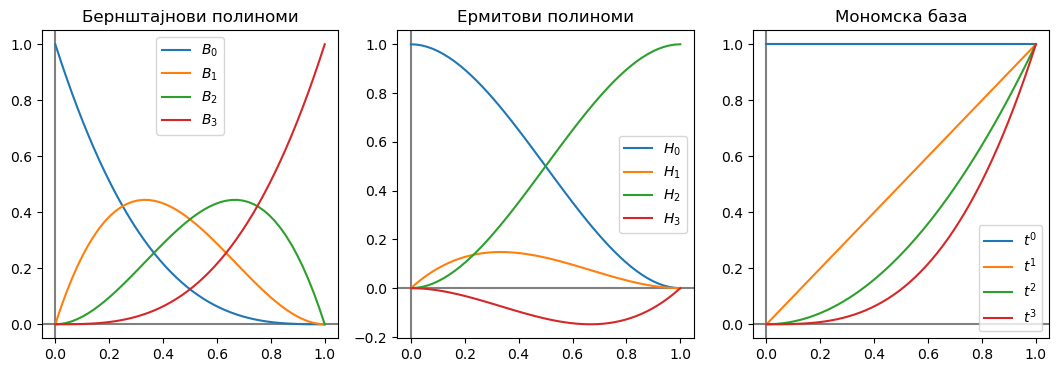

In [72]:
t=np.linspace(0,1)
plt.figure(figsize=(13,4))

plt.subplot(131)
plt.title("Бернштајнови полиноми")
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
for i in range(4):
    p=np.polyval(B[:,i],t)
    plt.plot(t,p,label='$B_'+str(i)+'$')
plt.legend();

plt.subplot(132)
plt.title("Ермитови полиноми")
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
for i in range(4):
    p=np.polyval(H[:,i],t)
    plt.plot(t,p,label='$H_'+str(i)+'$')
plt.legend();

plt.subplot(133)
plt.title("Мономска база")
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
for i in range(4):
    p=np.polyval(I[:,3-i],t)
    plt.plot(t,p,label='$t^'+str(i)+'$')
plt.legend();

***

Карактеристика Хамелове базе јесте да садржи бесконачно много вектора, али се израчунавања спроводе само над коначно много њих. За простор функција испоставља се да појам Хамелове базе није довољан. Овакве базе буду превелике чак и ако се ограничимо на скупове диференцијабилних функција, или неке друге значајне скупове. Захваљујући норми можемо да продужимо израчунавања на пребројиве суме. За то је потребна дефиниција конвергенције низова вектора.

**Дефиниција 6.** За низ вектора $\{v_k\}$ нормираног векторског простора $V$ кажемо да конвергира ка вектору $a\in V$ ако $\|a-v_k\|\to0,$ $k\to\infty.$ 

Конвергенцију вектора означавамо са:
	$$v_k\to a,\ k\to\infty\ \Longleftrightarrow\ \|a-v_k\|\to0,\ k\to\infty.$$ 

За пребројиву суму пишемо $\displaystyle\sum_{k\in\mathbb{N}_0}\lambda_kv_k=v$ уколико важи 
$$\lim_{n\to\infty}\sum_{k\in(n)}\lambda_kv_k= v.$$

Суме $\displaystyle\sum_{k\in\mathbb{N}_0}\lambda_kv_k$ зовемо редови. Ред је конвергентан уколико постоји горња гранична вредност и вектор $v$ тада зовемо сума реда.

**Дефиниција 7.** Скуп вектора $(b)\subset V$ нормираног векторског простора $V$ је [*Шаудерова база*](https://en.wikipedia.org/wiki/Schauder_basis) ако за произвољан вектор $v\in V$ постоје јединствени скалари  $\lambda_k,\ k\geq0$ тако да важи     
$$\displaystyle\sum_{k\in\mathbb{N}_0}\lambda_kb_k=v.$$

**Пример 14.** За функцију која је диференцијабилна произвољан број пута Тејлоров развој у околини изабране тачке представља пребројиву суму степена $(x-a)^k.$ Важи једнакост између функције и њеног Тејлоровог развоја у околини тачке развоја.
$$f(x)=\sum_{k\in\mathbb{N}_0}\dfrac{f^{(k)}(a)}{k!}\,(x-a)^k.$$
У овом случају скуп $\{(x-a)^k\ |\ k\in\mathbb{N}_0\}$ представља Шаудерову базу на скупу функција диференцијабилних произвољан број пута у околини тачке $a.$

За периодичне функције Шаудерову базу чине основни хармоници $\cos(kx), \sin(kx),\ k\in\mathbb{N}_0.$ Коначне линеране комбинације ових функција зовемо тригонометријски полиноми.

Кроз теме које следе упознаћемо детаљније просторе функција, нарочито полинома и тригонометријских полинома.

***

Од посебног значаја за нумеричке алгоритме су **ортонормиране базе** (orthonormal basis) - базе чији је скуп вектора дужине 1 и вектори су у паровима ортогонални. За скуп вектора $(q):\{q_0,q_1,\dots,q_{n-1},\dots\}\subset\mathbb{K}^n$ ова два услова краће записујемо:
$$q_i\cdot q_j=\begin{cases}0,&i\neq j,\\ 1,&i=j.\end{cases}$$

Координате $\lambda_k$ вектора $v$ у односу на базу $(q)$ 
$$v=\sum_{k\in\mathbb{N}_0}\lambda_k q_k$$  зову се  **Фуријеове координате** и могу једноставно да се израчунају на основу скаларног производа 
$\lambda_k=v\cdot q_k.$

$v=\lambda_0 q_0+\lambda_1 q_1+\dots+\lambda_{n-1} q_{n-1}\ /\cdot q_0$

$v\cdot q_0=\lambda_0(q_0\cdot q_0)+\lambda_1(q_1\cdot q_0)+\dots+\lambda_{n-1}(q_{n-1}\cdot q_0)$

Индукована норма скаларним производом тада износи
$$\|v\|^2=\sum_{k\in\mathbb{N}_0}\lambda_k^2.$$

Поступак трансформације произвољне базе у ортонормирану базу је Грам-Шмитов алгоритам, познат из Математике 1.

Уграђена функција за налажење ортонормиране базе из скупа вектора-колона матрице је `linalg.qr`. Овом функцијом се добијају и координате улазних вектора-колона у односу на нову базу.

In [73]:
A=np.array([[1,-1,1.],[0,0,2],[1,2,0]])
np.linalg.matrix_rank(A)

3

In [74]:
Q,R=np.linalg.qr(A,mode='reduced')  
print(np.round(Q,6))  #kolone su ortonormirana baza
print(np.round(R,6))  #kolone su koordinate kolona matrice A u odnosu na novu bazu
np.round(Q@R,5) #dobijanje matrice A natrag

[[-0.707107  0.707107  0.      ]
 [-0.        0.       -1.      ]
 [-0.707107 -0.707107  0.      ]]
[[-1.414214 -0.707107 -0.707107]
 [ 0.       -2.12132   0.707107]
 [ 0.        0.       -2.      ]]


array([[ 1., -1.,  1.],
       [ 0.,  0.,  2.],
       [ 1.,  2., -0.]])

Треба бити опрезан са применом ове уграђене функције.

In [75]:
L=np.array([[1,0,0],[-1.,1,0],[1,2,2.],[1,1,1]])
U=np.array([[2,1,-1,0,3.],[0,1,1,-2.,3.],[0,0,-1,2,1.]])   
B=L@U
print(B)

[[ 2.  1. -1.  0.  3.]
 [-2.  0.  2. -2.  0.]
 [ 2.  3. -1.  0. 11.]
 [ 2.  2. -1.  0.  7.]]


In [76]:
np.linalg.matrix_rank(B)

3

In [77]:
B.shape

(4, 5)

Видимо да је матрица $B$ сингуларна. Дакле ортонормирана база на основу колона биће састављена од три вектора. То уграђена функција не региструје на адекватан начин

In [78]:
Q,R=np.linalg.qr(B,mode='reduced')  #direktiva za redukovanu QR
print(np.round(Q,6))
print(np.round(R,6))
np.round(Q@R,5)

[[-0.5       0.223607  0.730297 -0.408248]
 [ 0.5      -0.67082   0.547723  0.      ]
 [-0.5      -0.67082  -0.365148 -0.408248]
 [-0.5      -0.223607  0.182574  0.816497]]
[[ -4.        -3.         2.5       -1.       -10.5     ]
 [  0.        -2.236068  -0.67082    1.341641  -8.273452]
 [  0.         0.         0.547723  -1.095445  -0.547723]
 [  0.         0.         0.        -0.        -0.      ]]


array([[ 2.,  1., -1.,  0.,  3.],
       [-2.,  0.,  2., -2.,  0.],
       [ 2.,  3., -1., -0., 11.],
       [ 2.,  2., -1.,  0.,  7.]])

***

**Задатак 7.** Одредити угао између вектора $v$ и $u$ у $3D$ који са координатним осама заклапа углове $\alpha_1,\beta_1,\gamma_1$ и $\alpha_2,\beta_2,\gamma_2,$ редом.

**Решење :** 

Ортонормирана база 
$u\cdot v=\|u\|\,\|v\|\,\cos\angle(u,v),$
\begin{align}
u&=u_x\,i+u_y\,j+u_z\,k,&& v=v_x\,i+v_y\,j+v_z\,k,\\
u_x&=u\cdot i=\|u\|\cos\angle(u,i)=\|u\|\cos\alpha_1,&& v_x=v\cdot i=\|v\|\cos\angle(v,i)=\|v\|\cos\alpha_2,\\
u_y&=u\cdot j=\|u\|\cos\angle(u,j)=\|u\|\cos\beta_1,&& v_y=v\cdot j=\|v\|\cos\angle(v,j)=\|v\|\cos\beta_2,\\
u_z&=u\cdot k=\|u\|\cos\angle(u,k)=\|u\|\cos\gamma_1,&& v_z=v\cdot k=\|v\|\cos\angle(v,k)=\|v\|\cos\gamma_2\\
u&=\|u\|\,\begin{bmatrix}\cos\alpha_1&\cos\beta_1&\cos\gamma_1\end{bmatrix}^T,&&
v=\|v\|\,\begin{bmatrix}\cos\alpha_2&\cos\beta_2&\cos\gamma_2\end{bmatrix}^T
\end{align}
$$\cos\angle(u,v)=\dfrac{u\cdot v}{\|u\|\,\|v\|}=\cos\alpha_1\cos\alpha_2+\cos\beta_1\cos\beta_2+\cos\gamma_1\cos\gamma_2.$$

***